In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_csv("/content/drive/MyDrive/Data Car Resale Value Prediction (3).zip (Unzipped Files)/Data/autos.csv",header=0,sep=',',encoding='Latin1')


In [ ]:
df.seller.value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [ ]:
df[df.seller != 'gewerblich']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [ ]:
df=df.drop('seller',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df.offerType.value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [ ]:
df[df.offerType !='Gesuch']

,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [ ]:
df=df.drop('offerType',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df.shape

(371528, 18)

In [ ]:
df.powerPS.value_counts()

0       40820
75      24035
60      15907
150     15442
140     13585
        ...  
1339        1
780         1
6920        1
1659        1
564         1
Name: powerPS, Length: 794, dtype: int64

In [ ]:
df=df[(df.powerPS > 50)&(df.powerPS <900)]
df.shape

(319709, 18)

In [ ]:
df.yearOfRegistration.value_counts()

2005    19234
1999    19094
2006    18937
2000    18489
2003    17982
        ...  
1931        1
8000        1
1500        1
1933        1
3500        1
Name: yearOfRegistration, Length: 103, dtype: int64

In [ ]:
df=df[(df.yearOfRegistration >=1950)&(df.yearOfRegistration <2017)]
df.shape

(309171, 18)

In [ ]:
df.drop(['name','abtest','dateCrawled','nrOfPictures','lastSeen','postalCode','dateCreated'],axis='columns',inplace=True)

In [ ]:
new_df =df.copy()
new_df =new_df.drop_duplicates(['price','vehicleType','yearOfRegistration','gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType','notRepairedDamage'])

In [ ]:
new_df.gearbox.replace(('manuell','automatik'),('manual','automatic'),inplace=True)
new_df.fuelType.replace(('benzin','andere','elektro'),('petrol','others','electric'),inplace=True)
new_df.vehicleType.replace(('kleinwagen','cabria','kombi','andere'),('small car','convertible','combination','others'),inplace=True)
new_df.notRepairedDamage.replace(('ja','nein'),('Yes','No'),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df.price.value_counts()

0        6040
1500     4256
500      4113
2500     3633
1200     3567
         ... 
1179        1
52620       1
20589       1
17501       1
10985       1
Name: price, Length: 5400, dtype: int64

In [ ]:
df.shape

(309171, 11)

In [ ]:
df.vehicleType.value_counts()

limousine     88521
kleinwagen    63898
kombi         62640
bus           27706
cabrio        21249
coupe         17538
suv           13674
andere         2523
Name: vehicleType, dtype: int64

In [ ]:
new_df =new_df[(new_df.price >=100)&(new_df.price <=150000)]

In [ ]:
df.fuelType.value_counts()

benzin     190662
diesel      96942
lpg          4842
cng           490
hybrid        244
andere         59
elektro        45
Name: fuelType, dtype: int64

In [ ]:
df.gearbox.value_counts()

manuell      234342
automatik     69531
Name: gearbox, dtype: int64

In [ ]:
df.isnull()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
371520,False,False,False,False,False,False,False,False,False,False,False
371524,False,False,False,False,False,False,False,False,False,False,False
371525,False,False,False,False,False,False,False,False,False,False,False
371526,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
df['fuelType'].isnull().any()

True

In [ ]:
df['gearbox'].isnull().any()

True

In [ ]:
df['model'].isnull().any()

True

In [ ]:
df['notRepairedDamage'].isnull().any()

True

In [ ]:
df['vehicleType'].isnull().any()

True

In [ ]:
df['kilometer'].isnull().any()

False

In [ ]:
df['yearOfRegistration'].isnull().any()

False

In [ ]:
df['monthOfRegistration'].isnull().any()

False

In [ ]:
df['powerPS'].isnull().any()

False

In [ ]:
df['price'].isnull().any()

False

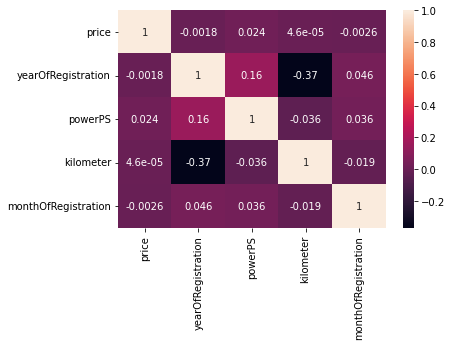

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)